<a href="https://colab.research.google.com/github/A-Kester/csci-451/blob/main/docs/live-notebooks/03-maximum-likelihood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Likelihood Estimation and Gradients

Estimating parameters of data-generating distributions using calculus.

## Recap: Log-Likelihood of the Linear-Gaussian Model

[Last time](02-signal-noise.qmd), we introduced the idea of modeling data as signal + noise, studied the Gaussian distribution as a model of noise, and introduced the linear-Gaussian model for prediction in the context of linear trends. We also derived the log-likelihood function for the linear-Gaussian model and introduced the idea that we could learn the signal of the data by maximizing the log-likelihood with respect to the model parameters. In this chapter, we’ll begin our study of how to maximize the likelihood systematically using tools from calculus.

## The Gradient of a Multivariate Function

As you can study in courses dedicated to multivariable calculus, the existence of all of a function’s partial derivatives does not necessarily imply that the function is *multivariate differentiable*. In this course, we’ll exclusively treat functions which are indeed multivariate differentiable unless otherwise noted, and so this distinction will not be an issue for us.

<span class="theorem-title">**Definition 1**</span> Let $f:\mathbb{R}^p\rightarrow \mathbb{R}$ be a function which accepts a vector input $\mathbf{w}=(w_1,\ldots,w_p)^T\in \mathbb{R}^p$ and returns a scalar output $f(\mathbf{w})\in \mathbb{R}$. The **partial derivative** of $f$ with respect to the $j$-th coordinate $w_j$ is defined as the limit

$$
\begin{aligned}
    \frac{\partial f}{\partial w_i} &= \lim_{h \rightarrow 0} \frac{f(w_1,\ldots,w_i + h, \ldots w_p) - f(w_1,\ldots,w_i, \ldots w_p)}{h} \\
    &= \lim_{h \rightarrow 0} \frac{f(\mathbf{w}+ h\mathbf{e}_i) - f(\mathbf{w})}{h}\;,
\end{aligned}
$$

where $\mathbf{e}_i = (0,0,\ldots,1,\ldots,0,0)^T$ is the $i$-th standard basis vector in $\mathbb{R}^p$, i.e., the vector with a 1 in the $i$-th position and 0’s elsewhere. If this limit does not exist, then the partial derivative is said to be undefined.

Just like in single-variable calculus, it’s not usually convenient to work directly with the limit definition of the partial derivative. Instead we use the following heuristic:

<span class="theorem-title">**Proposition 1**</span> To compute $\frac{\partial f}{\partial w_i}$, treat all other variables $w_j$ for $j\neq i$ as constants, and differentiate $f$ with respect to $w_i$ using the usual rules of single-variable calculus (power rule, product rule, chain rule, etc.).

<span class="theorem-title">**Exercise 1 (Practice with Partial Derivatives)**</span> Let $f:\mathbb{R}^3\rightarrow \mathbb{R}$ be defined by $f(x,y,z) = x^2\sin y + yz + z^3x$. Compute $\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$, and $\frac{\partial f}{\partial z}$.

> **Solution for <a href="#exr-partial-derivative-example-1" class="quarto-xref">Exercise 1</a>**
>
> To compute $\frac{\partial f}{\partial x}$, we treat $y$ and $z$ as constants, which yields
>
> $$
> \frac{\partial f}{\partial x} = 2x \sin y + z^3\;.
> $$
>
> Similarly, we can compute $\frac{\partial f}{\partial y}$ and $\frac{\partial f}{\partial z}$:
>
> $$
> \begin{align}
>     \frac{\partial f}{\partial y} &= x^2 \cos y + z \\
>     \frac{\partial f}{\partial z} &= y + 3z^2 x\;.    
> \end{align}
> $$

<span class="theorem-title">**Definition 2**</span> Let $f:\mathbb{R}^p\rightarrow \mathbb{R}$ be a differentiable function which accepts a vector input $\mathbf{w}=(w_1,\ldots,w_p)^T\in \mathbb{R}^p$ and returns a scalar output $f(\mathbf{w})\in \mathbb{R}$. The **gradient** of $f$ at $\mathbf{w}$, written $\nabla f(\mathbf{w}) \in \mathbb{R}^p$, is the vector of partial derivatives

$$
\begin{align}
    \nabla f(\mathbf{w}) &= \begin{pmatrix}
    \frac{\partial f}{\partial w_1} \\
    \frac{\partial f}{\partial w_2} \\
    \vdots \\
    \frac{\partial f}{\partial w_p}
    \end{pmatrix}\;.
\end{align}
$$

<span class="theorem-title">**Exercise 2 (Writing Gradients)**</span> Write the gradient of the function in <a href="#exr-partial-derivative-example-1" class="quarto-xref">Exercise 1</a>.

> **Solution for <a href="#exr-gradient-example-1" class="quarto-xref">Exercise 2</a>**
>
> In the function from <a href="#exr-partial-derivative-example-1" class="quarto-xref">Exercise 1</a>, the gradient is given by stacking the partial derivatives we computed into a single vector:
>
> $$
> \begin{aligned}
>     \nabla f(x, y, z) =
>      \begin{pmatrix}
>     \frac{\partial f}{\partial x} \\
>     \frac{\partial f}{\partial y} \\
>     \frac{\partial f}{\partial z}
>     \end{pmatrix} &=
>     \begin{pmatrix}
>     2x \sin y + z^3 \\
>     x^2 \cos y + z \\
>     y + 3z^2 x  
>     \end{pmatrix}
>     \in \mathbb{R}^3\;.
> \end{aligned}
> $$

<span class="theorem-title">**Exercise 3**</span> Consider the *mean-squared error* function for a simple linear model with parameters $w_0$ and $w_1$:

$$
\begin{aligned}
    R(\mathbf{x}, \mathbf{y}; w_0, w_1) = \frac{1}{n} \sum_{i = 1}^n (y_i - w_1x_i - w_0)^2\;.
\end{aligned}
$$

Compute the gradient $\nabla R(\mathbf{x}, \mathbf{y}; w_0, w_1)$ with respect to the parameters $w_0$ and $w_1$.

*Note: we’ll soon see that this function is closely related to the log-likelihood of the linear-Gaussian model*.

> **Solution for <a href="#exr-linear-gaussian-gradient" class="quarto-xref">Exercise 3</a>**
>
> We can compute the gradient by computing each partial derivative in turn:
>
> $$
> \begin{aligned}
>     \frac{\partial R}{\partial w_0} &= \frac{2}{n} (y_i - w_1x_i - w_0) \\
>     \frac{\partial R}{\partial w_1} &= \frac{-2}{n} x_i(y_i - w_1x_i - w_0) \;,
> \end{aligned}
> $$ where we’ve used the rules for derivatives. Stacking these into a vector gives
>
> $$
> \begin{aligned}
>     \nabla R(\mathbf{x}, \mathbf{y}; w_0, w_1) = \frac{2}{n} \begin{pmatrix}
>     \sum_{i=1}^n (y_i - w_1x_i - w_0) \\
>     \sum_{i=1}^n x_i (y_i - w_1x_i - w_0)
>     \end{pmatrix}
> \end{aligned}
> $$

### Checking Gradients with `torch`

The `pytorch` package, which we’ll use throughout this course, implements *automatic differentiation*. Automatic differentiation is an extraordinarily powerful tool which we’ll study later in the course. For now, we’ll just note that it provides a handy way to check calculations of derivatives and gradients. For example, we can use `torch` to check the gradient we computed in <a href="#exr-gradient-example-1" class="quarto-xref">Exercise 2</a> as follows:

In [4]:
import torch
x = torch.tensor([1.0, 2.0, 3.0])

f = lambda x: x[0]**2 * torch.sin(x[1]) + x[1]*x[2] + x[2]**3 * x[0]

our_grad = torch.tensor([
    2*x[0] * torch.sin(x[1]) + x[2]**3,
    x[0]**2 * torch.cos(x[1]) + x[2],
    x[1] + 3*x[2]**2 * x[0]
])
print(our_grad)

x.requires_grad_()
y = f(x)
y.backward()
print(x.grad)

tensor([28.8186,  2.5839, 29.0000])
tensor([28.8186,  2.5839, 29.0000])


The two approaches agree! As we grow comfortable with the calculus, we’ll begin to rely more on torch’s automatic differentiation capabilities to compute gradients for us.

### The Gradient Points In the Direction of Greatest Increase

An important feature of the gradient is that it tells us the direction in which a small change in the function inputs $\mathbf{w}$ could produce the greatest increase in the function output $f(\mathbf{w})$. Equivalently, the gradient points directly *away* from the direction of greatest decrease in the function output. Here’s an example using the function from <a href="#exr-linear-gaussian-gradient" class="quarto-xref">Exercise 3</a>. `torch` makes it very easy to implement this function.

In [8]:
def MSE(x, y, w0, w1):
  return ((y - (w1*x + w0))**2).mean()

We first plot the function as a function of the parameters $w_0$ and $w_1$ and then we overlay arrows representing the gradients at various points in the $(w_0, w_1)$ space, with the gradients calculated via automatic differentiation in `torch`.

Figure 1: Visualization of the gradients of the mean-squared error function with respect to the parameters $w_0$ and $w_1$. The background color indicates the value of the mean-squared error, with lighter colors representing higher values. Dotted curves give contours along which the function is constant. The black arrows represent the gradients at various points in the $(w_0, w_1)$ space, pointing in the direction of greatest increase of the mean-squared error function.

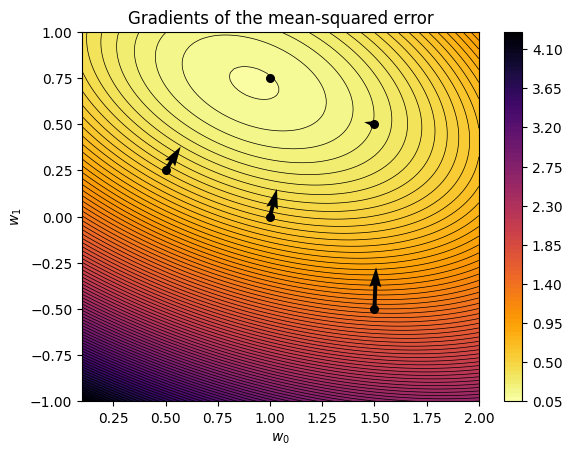

In [9]:
from matplotlib import pyplot as plt

# create the grid of (mu, sigma^2) values and the data
w0_grid = torch.linspace(-1, 1, 100)
w1_grid = torch.linspace(0.1, 2, 100)
W0, W1 = torch.meshgrid(w0_grid, w1_grid, indexing='ij')

x = torch.tensor([0.5, -1.0, 1.0, 0.7, 0.3])  # example data points
y = torch.tensor([1.0, 0.0, 2.0, 1.5, 0.5])

LL = torch.zeros(W0.shape)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        LL[i, j] = MSE(x, y, W0[i, j], W1[i, j])


# initialize the figure
fig, ax = plt.subplots()

# show the log-likelihood as a contour plot
im = ax.contourf(LL.numpy(), levels=100, cmap='inferno_r', extent = [w1_grid[0], w1_grid[-1], w0_grid[0], w0_grid[-1]])
ax.contour(LL.numpy(), levels=100, colors='black', linewidths=0.5, extent = [w1_grid[0], w1_grid[-1], w0_grid[0], w0_grid[-1]])

ax.set_ylabel(r'$w_1$')
ax.set_xlabel(r'$w_0$')

# compute and plot the gradients at various points
for w0, w1 in [( -0.5, 1.5), (0.0, 1.0), (0.5, 1.5), (.25, 0.5), (0.75, 1.0)]:
    w0_tensor = torch.tensor(w0, requires_grad=True)
    w1_tensor = torch.tensor(w1, requires_grad=True)

    ll = MSE(x, y, w0_tensor, w1_tensor)
    ll.backward()

    grad_w0 = w0_tensor.grad.item()
    grad_w1 = w1_tensor.grad.item()

    ax.quiver(w1, w0, -grad_w1, -grad_w0, color='black', scale=20, width=0.01)
    ax.scatter(w1, w0, color='black', s=30)

plt.colorbar(im)
ax.set_title('Gradients of the mean-squared error')
plt.show()

Each line has a distinct MSE
Two observations about <a href="#fig-mse" class="quarto-xref">Figure 1</a> are worth noting:

1.  The gradient arrows always point uphill and are orthogonal (at right angles with) to the contour lines of the function.
2.  The gradient arrows get smaller as we approach the maximum of the log-likelihood function, eventually becoming zero at the maximum itself.

Both of these features are possible to prove mathematically, although we won’t do so here.

## Critical Points and Local Extrema

One way we can use gradients is by analytically computing the local extrema of a function: solve the equation $\nabla \mathcal{L}(\mathbf{w}) = 0$ for $\mathbf{w}$ to find critical points of the log-likelihood, and then check which of these points are local maxima.

A critical point of a multivariate function is a point at which all of its partial derivatives are equal to zero. Critical points are candidates for local maxima or minima of the function, and so they are of interest when performing maximum-likelihood estimation by solving $\nabla \mathcal{L}(\mathbf{w}) = 0$.

<span class="theorem-title">**Definition 3 (Critical Points of Multivariate Functions)**</span> A *critical point* of a differentiable function $f:\mathbb{R}^p\rightarrow \mathbb{R}$ is a point $\mathbf{w}^* \in \mathbb{R}^p$ such that $\nabla f(\mathbf{w}^*) = \mathbf{0}$ (the zero vector in $\mathbb{R}^p$).

All critical points of a function can be identified by solving the system of equations $\nabla f(\mathbf{w}) = \mathbf{0}$. In a few rare cases, it’s possible to solve this system analytically to find all critical points.

The notation $\lVert \mathbf{v} \rVert_2$ refers to the Euclidean norm of $\mathbf{v}$, with formula

$$
\begin{aligned}
    \lVert \mathbf{v} \rVert_2 = \sqrt{\sum_{i = 1}^p v_i^2}\;.
\end{aligned}
$$

<span class="theorem-title">**Definition 4 (Local Minima and Maxima)**</span> A *local minimum* of a differentiable function $f:\mathbb{R}^p\rightarrow \mathbb{R}$ is a point $\mathbf{w}^* \in \mathbb{R}^p$ such that there exists some radius $r>0$ such that for all $\mathbf{w}$ with $\|\mathbf{w}- \mathbf{w}^*\|_2 < r$, we have $f(\mathbf{w}) \geq f(\mathbf{w}^*)$. A *local maximum* is defined similarly, with the inequality reversed: for all $\mathbf{w}$ with $\|\mathbf{w}- \mathbf{w}^*\|_2 < r$, we have $f(\mathbf{w}) \leq f(\mathbf{w}^*)$.

The Mild Conditions of <a href="#thm-extrema" class="quarto-xref">Theorem 1</a> are that $f$ is continuously differentiable in an open neighborhood around $\mathbf{w}^*$.

<span class="theorem-title">**Theorem 1 (Local Extrema are Critical Points)**</span> Under Mild Conditions\*, if $\mathbf{w}^*$ is a local extremum (minimum or maximum) of a differentiable function $f:\mathbb{R}^p\rightarrow \mathbb{R}$, then $\mathbf{w}^*$ is a critical point of $f$.

> **We Always Minimize**
>
> Although our motivating problem is still *maximum* likelihood estimation, it is conventional in the literature on statistics, machine learning, and optimization to always seek *minima* of a given function. This works because maximizing $\mathcal{L}(\mathbf{w})$ is equivalent to minimizing $-\mathcal{L}(\mathbf{w})$. Therefore, in the remainder of this chapter and in subsequent chapters, we will often refer to “minimizing the negative log-likelihood” rather than “maximizing the log-likelihood.” Perhaps confusingly, we’ll still refer to the result as the “maximum likelihood estimate” (MLE).

<a href="#thm-extrema" class="quarto-xref">Theorem 1</a> tells us that we can try to find the maximum likelihood estimate of a parameter vector $\mathbf{w}$ by solving the equation $\nabla \mathcal{L}(\mathbf{w}) = \mathbf{0}$. In principle, we should then check that the critical points we find are indeed minima of $-\mathcal{L}(\mathbf{w})$ rather than maxima or saddle points, which can sometimes be done using the multivariate second-derivative test. In practice, however, this second step is often skipped. $-\mathcal{L}$

Equipped with the concept of critical points, we are ready to find maximum likelihood estimates by solving the equation $\nabla \mathcal{L}(\mathbf{w}) = \mathbf{0}$.

By convention, the maximum-likelihood estimate of a parameter is given a “hat” symbol, so we would write the MLE estimators we found above as $\hat{\mu}$ and $\hat{\sigma}^2$.

## Revisiting the Linear-Gaussian Log-Likelihood

Let’s now consider the linear-Gaussian model from [last chapter](02-signal-noise.qmd). In this model, we assume that each observed target variable $y_i$ is sampled from a Gaussian distribution with mean equal to a linear function of the corresponding feature vector $x_i$:

$$
\begin{aligned}
    y_i &\sim \mathcal{N}(w_1 x_i + w_0, \sigma^2)\;,
\end{aligned}
$$

To find the maximum-likelihood estimates given a data set of pairs $(x_i,y_i)$ for $i=1,\ldots,n$, we need to compute the log-likelihood function for this model, which as per last chapter is

$$
\begin{aligned}
    \mathcal{L}(\mathbf{x}, \mathbf{y}; w_1, w_0) &= \sum_{i = 1}^n \log p_y(y_i;w_1x_i + w_0; \sigma^2) \\
    &= \sum_{i = 1}^n \log \left( \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(y_i - (w_1 x_i + w_0))^2}{2\sigma^2} \right) \right) \\
    &= \sum_{i = 1}^n \left( -\frac{1}{2} \log(2\pi \sigma^2) - \frac{(y_i - (w_1 x_i + w_0))^2}{2\sigma^2} \right) \\
    &= \underbrace{-\frac{n}{2} \log(2\pi \sigma^2)}_{C} - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - (w_1 x_i + w_0))^2 \\
    &= C - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - w_1 x_i - w_0)^2 \\
    &= C - \frac{n}{2\sigma^2} \cdot \frac{1}{n} \sum_{i=1}^n (y_i - w_1 x_i - w_0)^2 \\
    &= C - \frac{n}{2\sigma^2} R(\mathbf{x}, \mathbf{y}; w_0, w_1)\;.
\end{aligned}
 \qquad(1)$$

We’ve collected terms that do not depend on $w_0$ or $w_1$ into a constant term $C$, and noticed that there’s a copy of the mean-squared error function $R(\mathbf{x}, \mathbf{y}; w_0, w_1) = \frac{1}{n}\sum_{i=1}^n (y_i - w_1 x_i - w_0)^2$ from <a href="#exr-linear-gaussian-gradient" class="quarto-xref">Exercise 3</a> appearing in the likelihood expression. Indeed, this term is the only that involves the parameters $w_0$ and $w_1$. This means:

> To **maximize** the likelihood $\mathcal{L}$ with respect to $w_0$ and $w_1$, we can equivalently **minimize** the mean-squared error $R(\mathbf{x}, \mathbf{y}; w_0, w_1)$.

## A First Look: Gradient Descent for Maximum Likelihood Estimation

Now that we have tools to compute gradients, we can use these gradients to find maximum-likelihood estimates numerically using a *gradient method*. There are many kinds of gradient methods, and they all have in common a simple idea:

<span class="theorem-title">**Definition 5 (Gradient Methods)**</span> A *gradient method* for optimizing a multivariate function $f:\mathbb{R}^p\rightarrow \mathbb{R}$ is an iterative algorithm which starts from an initial guess $\mathbf{w}^{(0)} \in \mathbb{R}^p$ and produces a sequence of estimates $\mathbf{w}^{(1)}, \mathbf{w}^{(2)}, \ldots$ by repeatedly updating the current estimate $\mathbf{w}^{(t)}$ in the direction of the negative gradient $-\nabla f(\mathbf{w}^{(t)})$, or some approximation thereof.

The simplest gradient method is *gradient descent* with *fixed learning rate*:

<span class="theorem-title">**Definition 6 (Gradient Descent)**</span> *Gradient descent* is an algorithm that iterates the update

$$
\begin{aligned}
    \mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha\nabla f(\mathbf{w}^{(t)})\;,
\end{aligned}
$$

where $\alpha \in \mathbb{R}_{>0}$ is a fixed hyperparameter called the *learning rate*.

Let’s use gradient descent to find maximum-likelihood estimates for the parameters of the linear-Gaussian model in a simple example. To visualize gradient descent, we’ll start by implementing a function for the linear-Gaussian log-likelihood in terms of the parameters $w_0$ and $w_1$:

Then we’ll generate some synthetic data from a linear-Gaussian model with known parameters:

In [12]:
# true parameters
w0 = torch.tensor(0.0)
w1 = torch.tensor(2.0)
sigma2 = torch.tensor(1.0)

# observed data
x = torch.linspace(-2, 2, 101)
signal = w1 * x + w0
noise = torch.sqrt(sigma2) * torch.randn_like(x)
y = signal + noise

Figure 2: Sample data from a linear-Gaussian model with true parameters $w_0 = 0$, $w_1 = 2$, and $\sigma^2 = 1$.

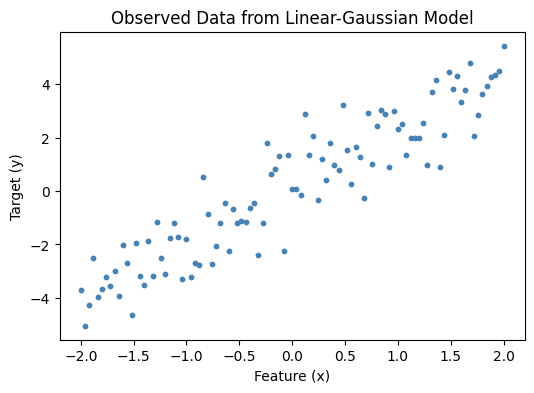

In [13]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.scatter(x, y, color='steelblue', s=10)
ax.set_xlabel('Feature (x)')
ax.set_ylabel('Target (y)')
t = ax.set_title('Observed Data from Linear-Gaussian Model')

Our aim in maximum likelihood estimation is to find estimators $\hat{w}_0$ and $\hat{w}_1$ which maximize the log-likelihood of the observed data. As we saw in <a href="#eq-linear-gaussian-to-mse" class="quarto-xref">Equation 1</a>, maximizing the log-likelihood is equivalent to minimizing the mean-squared error between the observed targets $y_i$ and the linear predictions $w_1 x_i + w_0$. Let’s go ahead and plot the mean-squared error:

Figure 3: Mean-squared error $R(\mathbf{x}, \mathbf{y}; w_0, w_1)$ for the linear-Gaussian model as a function of the intercept $w_0$ and slope $w_1$ with the data shown in <a href="#fig-linear-gaussian-data" class="quarto-xref">Figure 2</a>. The dot indicates the location of the true parameters used to generate the data.

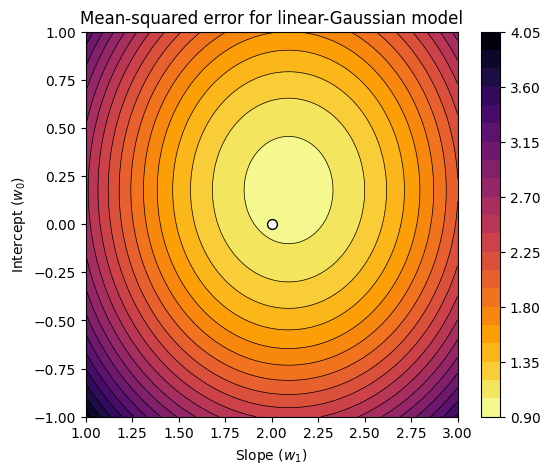

In [14]:
w0_grid = torch.linspace(-1, 1, 100)
w1_grid = torch.linspace(1, 3, 100)

W0, W1 = torch.meshgrid(w0_grid, w1_grid, indexing='ij')

LL = torch.zeros(W0.shape)

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        LL[i, j] = MSE(x, y, W0[i, j], W1[i, j])

# visualize the log-likelihood surface
fig, ax = plt.subplots(figsize=(6, 5))

im = ax.contourf(LL.numpy(), levels=20, cmap='inferno_r', extent = [w1_grid[0], w1_grid[-1], w0_grid[0], w0_grid[-1]])
ax.contour(LL.numpy(), levels=20, colors='black', linewidths=0.5, extent = [w1_grid[0], w1_grid[-1], w0_grid[0], w0_grid[-1]])
ax.set_ylabel(r'Intercept ($w_0$)')
ax.set_xlabel(r'Slope ($w_1$)')
plt.colorbar(im, ax=ax)
ax.set_title('Mean-squared error for linear-Gaussian model')

ax.scatter([w1], [w0], color='black', s=50, label='True Parameters', facecolors='white')

> **Question**
>
> > Why does this surface have only one minimum, and why is that minimum so close to the true parameters used to generate the data? Seems pretty convenient!
>
> It is convenient! The uniqueness of the local minimum is due to a property called *convexity* that we’ll study later in the course. The closeness of the minimum to the true parameters is a consequence of the *consistency* property of maximum-likelihood estimators, which you can study in courses on statistical inference.

The gradient descent algorithm will start from an initial guess for the parameters $(w_0, w_1)$ and iteratively update this guess in the direction of the negative gradient of the negative log-likelihood.

### Object-Oriented API for ML Models

Here we’ll introduce our the *object-oriented API* for machine learning models which we’ll use throughout this course. For this we need a *model class* which will represent the linear-Gaussian model and an *optimizer class* which will implement the gradient descent algorithm.

#### Model Class

The primary responsibility of the model class is to store the weight parameters and to implement a method called `forward` which computes the model’s predictions (estimate of the signal) given an input $x$. Here’s a simple implementation of a model class for 1d linear regression:

In [25]:
class LinearRegression1D:

  def __init__(self):
    self.w0 = torch.tensor(1.0)
    self.w1 = torch.tensor(1.0)

  def forward(self, x):
    return self.w1 * x + self.w0

#### Optimizer Class

The primary responsibility of the optimizer class is to implement the optimization algorithm of choice in the `step` method. If we aren’t using automatic differentiation, then the optimizer is also a good place to compute the gradients of the loss function with respect to the model parameters. Here’s a simple implementation of a gradient descent optimizer for 1d linear regression:

In [26]:
class GradientDescentOptimizer1D:

  def __init__(self, model, lr = 0.01):
    self.model = model
    self.lr = lr

# implementation of gradient descent
  def step(self, x, y):
    w0_grad, w1_grad = self.grad_func(x, y)
    self.model.w0 -= self.lr * w0_grad
    self.model.w1 -= self.lr * w1_grad

# derivative of MSE function
  def grad_func(self, x, y):
    w0_grad = -2 * (y - (self.model.w1 * x + self.model.w0)).mean()
    w1_grad = -2 * (x * (y - (self.model.w1 * x + self.model.w0))).mean()
    return w0_grad, w1_grad

#### Training Loop

Once we’ve implemented our two classes, the main “training loop” just requires us to repeatedly call the `step` method of the optimizer, which updates `model.w0` and `model.w1` at each iteration. We can also keep track of the history of parameter values across iterations to visualize the trajectory of the algorithm on the surface of the mean-squared error function.

In [27]:
model = LinearRegression1D()
opt   = GradientDescentOptimizer1D(model, lr = 0.05)

w0_history = [model.w0.item()]
w1_history = [model.w1.item()]

# trained model
epochs = 100
for _ in range(epochs):
  opt.step(x, y)
  w0_history.append(model.w0.item())
  w1_history.append(model.w1.item())

<a href="#fig-linear-gaussian-gradient-descent" class="quarto-xref">Figure 4</a> shows the trajectory of the gradient descent algorithm on the negative log-likelihood surface, ultimately landing near the minimal value of the MSE and close to the true parameters used to generate the data. We also show the fitted linear model corresponding to the final estimates of $w_0$ and $w_1$, which visually agrees well with the data.

Figure 4: Trajectory of the gradient descent algorithm (black line with dots) on the negative log-likelihood surface for the linear-Gaussian model from <a href="#fig-linear-gaussian-log-likelihood" class="quarto-xref">Figure 3</a>. The starting point of the algorithm is at the beginning of the line, and each dot represents an iteration of the algorithm. The dot indicates the location of the true parameters used to generate the data.

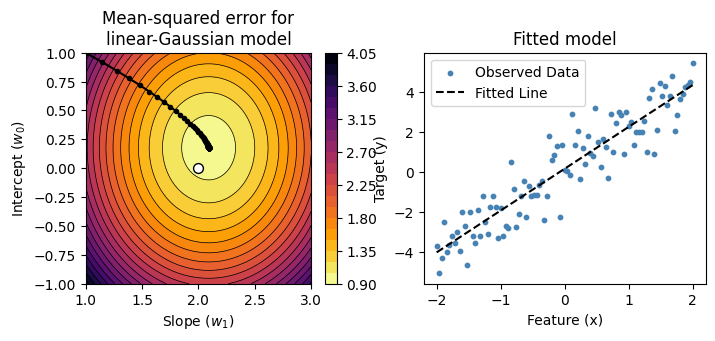

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

im = ax[0].contourf(LL.numpy(), levels=20, cmap='inferno_r', extent = [w1_grid[0], w1_grid[-1], w0_grid[0], w0_grid[-1]])
ax[0].contour(LL.numpy(), levels=20, colors='black', linewidths=0.5, extent = [w1_grid[0], w1_grid[-1], w0_grid[0], w0_grid[-1]])
ax[0].set_ylabel(r'Intercept ($w_0$)')
ax[0].set_xlabel(r'Slope ($w_1$)')
plt.colorbar(im, ax=ax[0])
ax[0].set_title('Mean-squared error for\nlinear-Gaussian model')
ax[0].plot(w1_history, w0_history, marker='o', color='black', label='Gradient Descent Path', markersize=3)
ax[0].scatter([w1], [w0], color='black', s=50, label='True Parameters', facecolors='white')

ax[1].scatter(x, y, color='steelblue', s=10, label='Observed Data')
ax[1].plot(x, model.w1.detach().item() * x + model.w0.detach().item(), color='black', label='Fitted Line', linestyle='--')
ax[1].legend()
ax[1].set_xlabel('Feature (x)')
ax[1].set_ylabel('Target (y)')
t = ax[1].set_title('Fitted model')

We have just completed a simple implementation of our first machine learning algorithm: gradient descent for 1d linear-Gaussian regression via maximum likelihood estimation. This algorithm appears to successfully learn the linear trend present in the data, as shown in the right panel of <a href="#fig-linear-gaussian-gradient-descent" class="quarto-xref">Figure 4</a>.